**TRABAJO INTEGRADOR DE PROBABILIDAD Y ESTADISTICA**

Trabajamos con un dataset que contiene los datos actualizados de 2024 de empleos y salarios en ciencia de datos.

Acerca del conjunto de datos
* work_year (año en el que se registraron los datos)
* experience_level (Nivel de experiencia)
* employment_type (Tipo de empleo)
* job_title (Nombre del trabajo)
* salary (Salario)
* salary_currency (La moneda en la que se paga el salario)
* salary_in_usd (Salario en dolares)
* employee_residence (Residencia del empleado)
* work_setting (Entorno o lugar de trabajo)
* company_location (Pais de la empresa)
* company_size (Tamaño de la empresa)
* job_category (Clasificación del puesto de trabajo en categorías)

In [68]:
#Librerias
import pandas as pd
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sb
import statsmodels.api as sm

In [69]:
#Dataset
df = pd.read_csv('jobs_in_data_2024_2.csv')

**Analisis Exploratorio**


Realizamos un analisis descriptivo de la variable salario en USD

La media de la variable es: 149472.05, con varianza 4144689138.77 y desviación estándar 64379.26


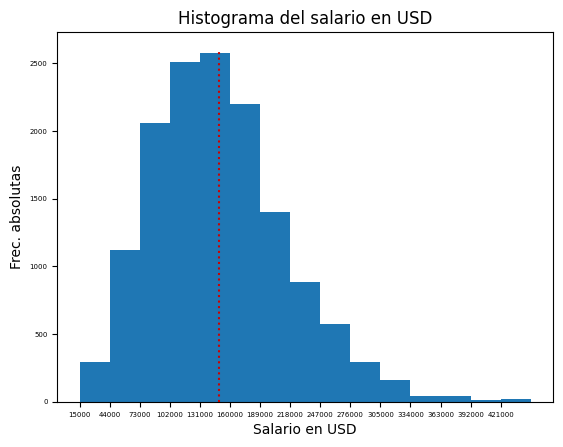

In [86]:

salario_en_USD = df['salary_in_usd']

media = salario_en_USD.mean()
varianza = salario_en_USD.var()
desviacion_estandar = salario_en_USD.std()

print(f"La media de la variable es: {media:.2f}, con varianza {varianza:.2f} y desviación estándar {desviacion_estandar:.2f}")

intervalos=round(1+3.3*np.log10(len(df)))
salario_en_USD.plot.hist(bins=intervalos,fontsize=5)
amplitud=round((salario_en_USD.max()-salario_en_USD.min())/intervalos,2)
plt.vlines(x=salario_en_USD.mean(),ymin=0,ymax=2600,color="#CC0000",linestyle='dotted')
plt.xlabel("Salario en USD")
plt.ylabel('Frec. absolutas')
plt.title("Histograma del salario en USD")
plt.xticks(np.arange(salario_en_USD.min(),salario_en_USD.max(),amplitud))
plt.show()



Realizamos un analisis comparativo de la variable Salario en USD por nivel de experiencia.

Para ello, decidimos utilizar un grafico de caja y bigotes por cada nivel.


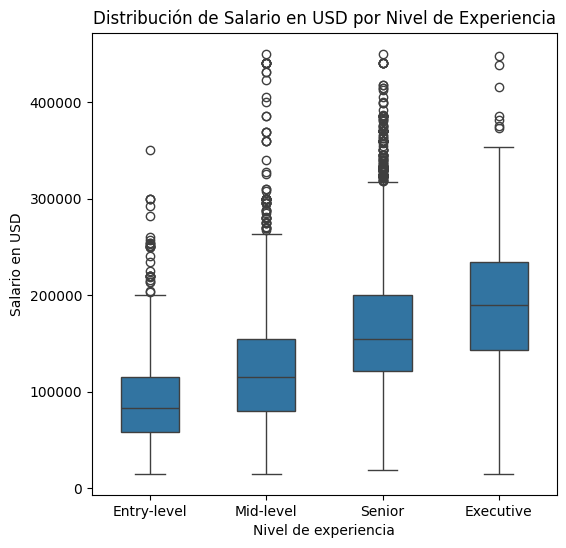

Nivel de experiencia: Entry-level
Cuartil 1 (Q1): 58000.0
Mediana (Q2): 83171.0
Cuartil 3 (Q1): 115000.0

Nivel de experiencia: Mid-level
Cuartil 1 (Q1): 80420.0
Mediana (Q2): 115000.0
Cuartil 3 (Q1): 154800.0

Nivel de experiencia: Senior
Cuartil 1 (Q1): 121000.0
Mediana (Q2): 155000.0
Cuartil 3 (Q1): 199700.0

Nivel de experiencia: Executive
Cuartil 1 (Q1): 143022.75
Mediana (Q2): 190000.0
Cuartil 3 (Q1): 234250.0



In [71]:
niveles=['Entry-level','Mid-level','Senior','Executive']

plt.figure(figsize=(6,6))
sb.boxplot(x='experience_level', y='salary_in_usd', data=df, width=0.5, 
           order=niveles)
plt.title('Distribución de Salario en USD por Nivel de Experiencia')
plt.xlabel("Nivel de experiencia")
plt.ylabel("Salario en USD")
plt.show()

for nivel in niveles:
    data=df[df['experience_level']==nivel]['salary_in_usd']
    q1=data.quantile(0.25)
    q2=data.median()
    q3=data.quantile(0.75)
    print(f'Nivel de experiencia: {nivel}')
    print(f"Cuartil 1 (Q1): {q1}\nMediana (Q2): {q2}\nCuartil 3 (Q1): {q3}\n")


Ademas, nos interesa analizar cual es la categoria de trabajo mas solicitada

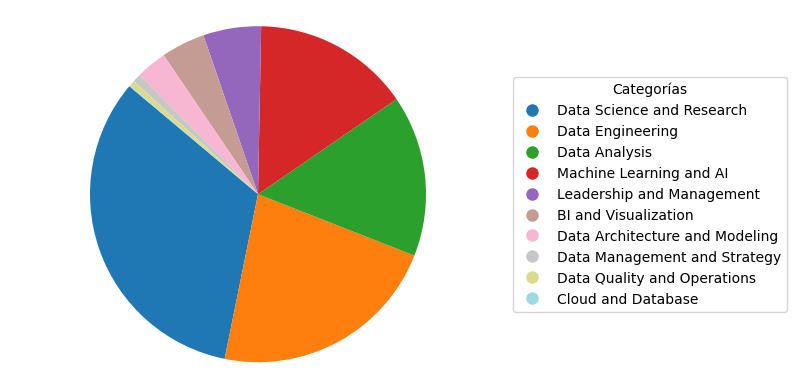

La moda de la variable Categoria de Trabajo es: Data Science and Research


In [72]:
category_counts = df['job_category'].value_counts()

labels = category_counts.index
sizes = category_counts.values
colors = plt.cm.tab20(np.linspace(0, 1, len(labels)))

fig, ax = plt.subplots()
ax.pie(sizes, colors=colors, startangle=140)
ax.axis('equal')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
plt.legend(handles, labels, title="Categorías", bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

moda = df['job_category'].mode()[0]
print(f"La moda de la variable Categoria de Trabajo es: {moda}")


**Analisis de probabilidad**


Nos interesa calcular la probabilidad de encontrar un trabajo de una empresa extranjera viviendo en Argentina

In [73]:
p = df[(df['employee_residence'] == 'Argentina') & (df['company_location'] != 'Argentina')].shape[0] / df.shape[0]
print(f'La probabilidad es : {p:.6f}')

La probabilidad es : 0.000282


Tambien queremos saber la probabilidad de que el sueldo sea mayor a 100000 sabiendo que el nivel de experiencia sea el minimo (Entry-level).

In [74]:
pAyB = df[(df['experience_level'] == 'Entry-level') & (df['salary_in_usd'] > 100000)].shape[0]
pB = df[df['experience_level']=='Entry-level'].shape[0]

pC = pAyB / pB

print(f'La probabilidad es: {pC:.6f}')

La probabilidad es: 0.325494


**Analisis de regresion**

Seleccionamos las variables Salario en USD e Impuestos Anuales para analizar si estan relacionadas

In [80]:
cov=df['annual_taxes'].cov(df['salary_in_usd'])
var1=df['annual_taxes'].var()
var2=df['salary_in_usd'].var()
coef = cov / np.sqrt(var1*var2)
print(f'Coeficiente de correlacion: {coef:.2f}')

Coeficiente de correlacion: 0.97


El resultado indica que estan fuertemente relacionadas

Prueba de regresion

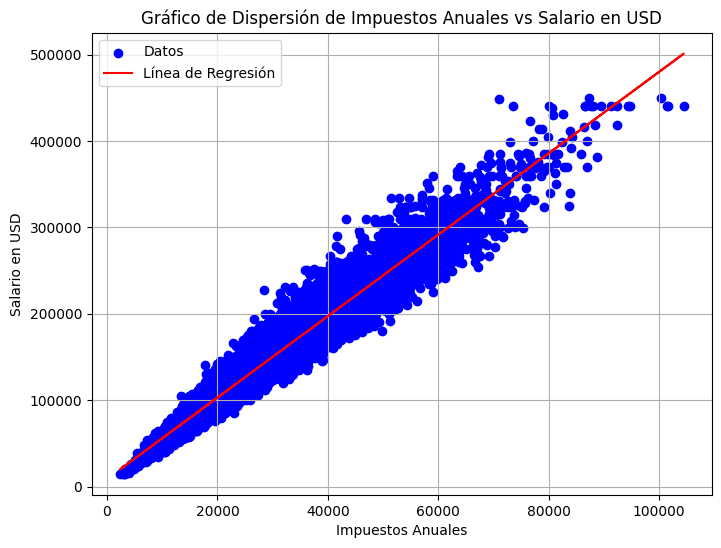

In [83]:
X = df['annual_taxes']
Y = df['salary_in_usd']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['annual_taxes'], df['salary_in_usd'], color='blue', label='Datos')
plt.plot(df['annual_taxes'], predictions, color='red', label='Línea de Regresión')
plt.title('Gráfico de Dispersión de Impuestos Anuales vs Salario en USD')
plt.xlabel('Impuestos Anuales')
plt.ylabel('Salario en USD')
plt.legend()
plt.grid(True)
plt.show()

En el grafico se observa la relacion lineal entre las variables

**Test de bondad y ajuste**

Realizaremos pruebas para determinar si las variables siguen una distribucion normal

* Test para la variable Salario en USD

In [106]:
significacion=0.05
p_valor = stats.normaltest(df['salary_in_usd']).pvalue
print(f"H0: Los datos ajustan a una distribucion normal\nH1: Los datos no ajustan a una distribucion normal")
print(f"P-valor={p_valor:.2f}")
if p_valor < significacion:
    print("Rechazar hipótesis nula")
else:
    print("No rechazar hipótesis nula")

H0: Los datos ajustan a una distribucion normal
H1: Los datos no ajustan a una distribucion normal
P-valor=0.00
Rechazar hipótesis nula


* Test para la variable Impuestos Anuales

In [105]:
significacion=0.05
p_valor = stats.normaltest(df['annual_taxes']).pvalue
print(f"H0: Los datos ajustan a una distribucion normal\nH1: Los datos no ajustan a una distribucion normal")
print(f"P-valor={p_valor:.2f}")
if p_valor < significacion:
    print("Rechazar hipótesis nula")
else:
    print("No rechazar hipótesis nula")

H0: Los datos ajustan a una distribucion normal
H1: Los datos no ajustan a una distribucion normal
P-valor=0.00
Rechazar hipótesis nula


**Estimacion con Intervalos y Test de Hipotesis**

Para continuar, generaremos una variable con distribucion normal en base a la variable Salario en USD

In [125]:
mean_salary = df['salary_in_usd'].mean()
std_salary = df['salary_in_usd'].std()

np.random.seed(0)  # Para reproducibilidad
salary_norm = np.random.normal(mean_salary, std_salary, len(df))

significacion=0.05
p_valor = stats.normaltest(salary_norm).pvalue
print(f"H0: Los datos ajustan a una distribucion normal\nH1: Los datos no ajustan a una distribucion normal")
print(f"P-valor={p_valor:.2f}")
if p_valor < significacion:
    print("Rechazar hipótesis nula")
else:
    print("No rechazar hipótesis nula")

H0: Los datos ajustan a una distribucion normal
H1: Los datos no ajustan a una distribucion normal
P-valor=0.16
No rechazar hipótesis nula


Test de hipotesis para la media con varianza desconocida

In [140]:
m0 = round(df['salary_in_usd'].mean())
print(f"Hipotesis nula vs Hipotesis alternativa")
print(f"H0: m = {m0} vs H1: m != {m0}\n")

m = salary_norm.mean()
s = salary_norm.std()
n = len(salary_norm)
alfa = 0.05

t = stats.t.ppf(1-alfa/2, n-1)
th0 = (m-m0) / (s/math.sqrt(n))

print(f'Media de la muestra: {m:.2f}')
print(f'Desviación estándar de la muestra: {s:.2f}')
print(f'Tamaño de la muestra: {n}')
print(f'Nivel de significacion: {alfa}')
print(f'\nRegla de decision:')
print(f'Rechazo H0 si la variable pivotal {th0:.2f} es menor que {-t:.2f} o mayor que {t:.2f}')

if (th0 < -t or th0 > t):
    print("Rechazo la hipotesis nula")
else:
    print("No rechazo la hipotesis nula")

Hipotesis nula vs Hipotesis alternativa
H0: m = 149472 vs H1: m != 149472

Media de la muestra: 148627.03
Desviación estándar de la muestra: 63898.69
Tamaño de la muestra: 14199
Nivel de significacion: 0.05

Regla de decision:
Rechazo H0 si la variable pivotal -1.58 es menor que -1.96 o mayor que 1.96
No rechazo la hipotesis nula


Intervalo de confianza para la varianza

In [146]:
nv_c = 0.95
v = np.var(salary_norm, ddof=1)
n = len(salary_norm) - 1

chi2_inf = stats.chi2.ppf((1 - nv_c) / 2, n)
chi2_sup = stats.chi2.ppf(1 - (1 - nv_c) / 2, n)

inf = (n * v) / chi2_sup
sup = (n * v) / chi2_inf

print(f'Varianza muestral: {v:.2f}')
print(f'Grados de libertad: {n}')
print(f'Nivel de confianza: {nv_c}')
print(f'\nIntervalo de confianza para la varianza: [{inf:.2f}, {sup:.2f}]')

vs = df['salary_in_usd'].var()
print(f'\nVarianza muestral de la variable Salario en USD: {vs:.2f}')

if vs < inf and vs > sup:
    print("La varianza no se encuentra dentro del intervalo")
else:
    print("La varianza se encuentra dentro del intervalo")

Varianza muestral: 4083330244.90
Grados de libertad: 14198
Nivel de confianza: 0.95

Intervalo de confianza para la varianza: [3989983530.51, 4180007226.70]

Varianza muestral de la variable Salario en USD: 4144689138.77
La varianza se encuentra dentro del intervalo
